## load and explore data

In [1]:
import pandas as pd

df = pd.read_csv('/content/1) iris.csv')

display(df.head())
display(df.info())
display(df.describe())

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


None

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Data cleaning and processing

In [2]:
print("Missing values before cleaning:")
display(df.isnull().sum())

print("\nNumber of duplicated rows before cleaning:", df.duplicated().sum())

# Remove duplicated rows
df.drop_duplicates(inplace=True)

print("\nNumber of duplicated rows after cleaning:", df.duplicated().sum())

print("\nDataFrame info after cleaning:")
display(df.info())

print("\nCleaned DataFrame head:")
display(df.head())

Missing values before cleaning:


,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0



Number of duplicated rows before cleaning: 3

Number of duplicated rows after cleaning: 0

DataFrame info after cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  147 non-null    float64
 1   sepal_width   147 non-null    float64
 2   petal_length  147 non-null    float64
 3   petal_width   147 non-null    float64
 4   species       147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.9+ KB


None


Cleaned DataFrame head:


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Exploratory Data Analysis (EDA)

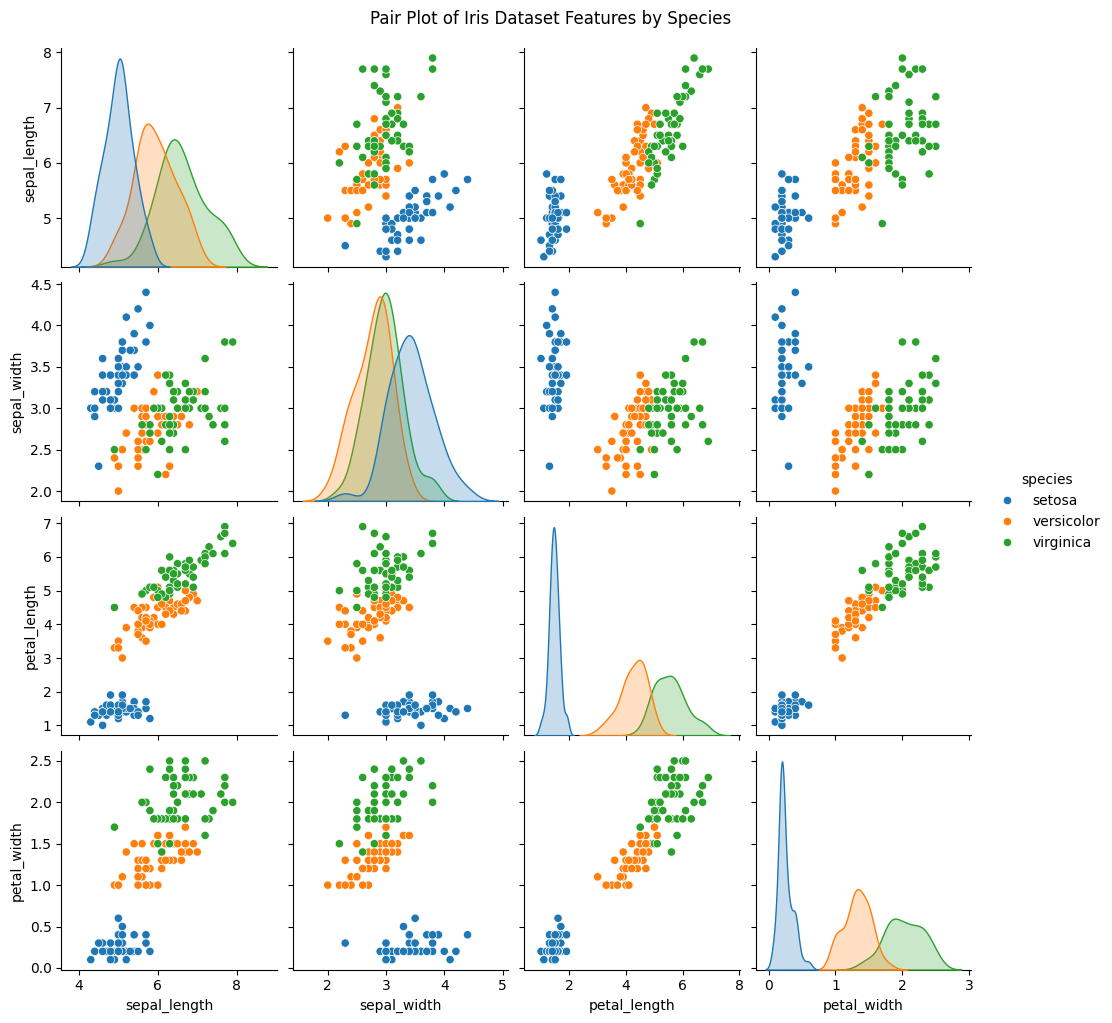

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Pair plot to show relationships between all pairs of features, colored by species
sns.pairplot(df, hue="species")
plt.suptitle("Pair Plot of Iris Dataset Features by Species", y=1.02)
plt.show()


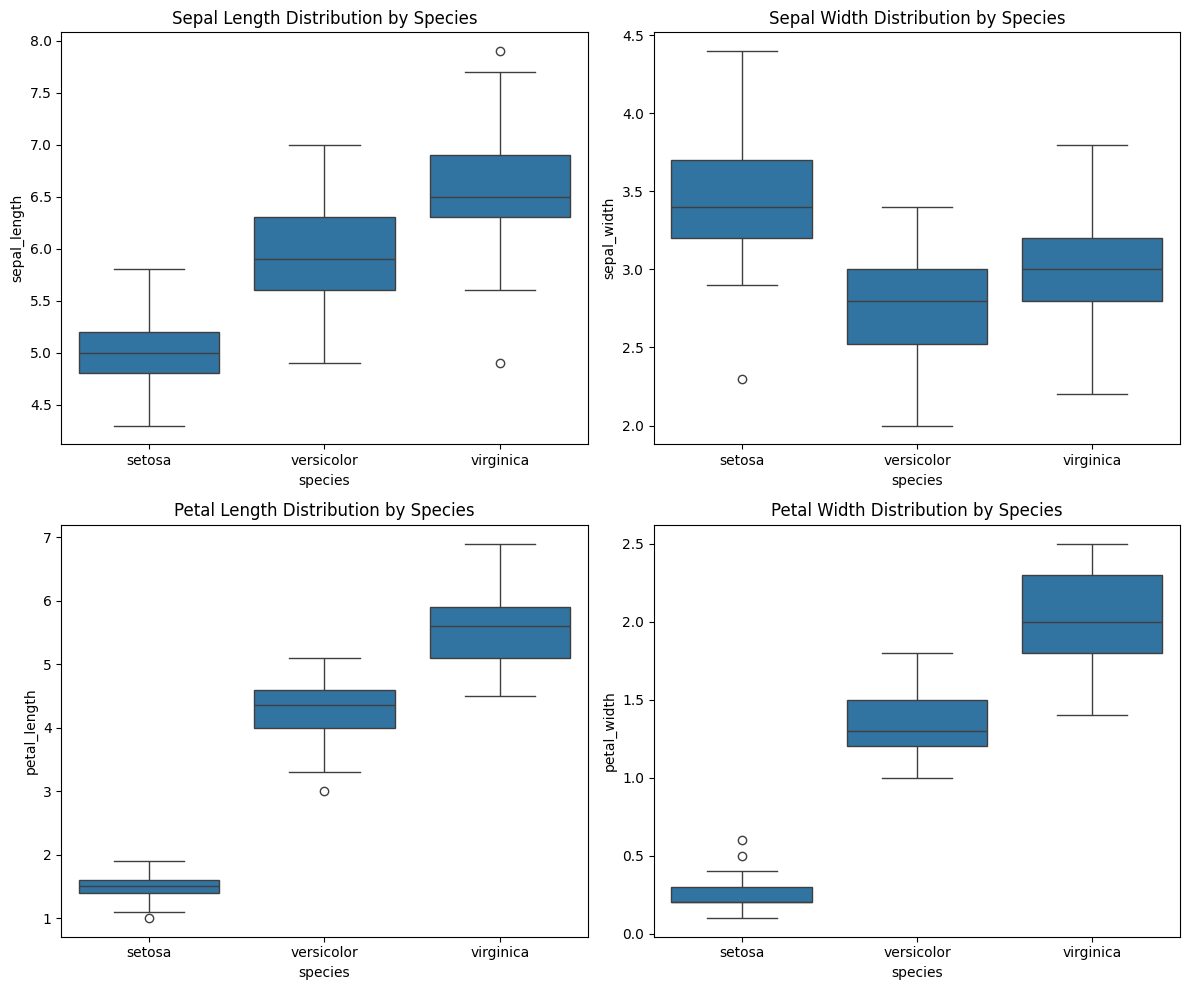

In [11]:
# 2. Box plot to show the distribution of each feature across different species
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.boxplot(ax=axes[0, 0], x='species', y='sepal_length', data=df)
axes[0, 0].set_title('Sepal Length Distribution by Species')
sns.boxplot(ax=axes[0, 1], x='species', y='sepal_width', data=df)
axes[0, 1].set_title('Sepal Width Distribution by Species')
sns.boxplot(ax=axes[1, 0], x='species', y='petal_length', data=df)
axes[1, 0].set_title('Petal Length Distribution by Species')
sns.boxplot(ax=axes[1, 1], x='species', y='petal_width', data=df)
axes[1, 1].set_title('Petal Width Distribution by Species')
plt.tight_layout()
plt.show()

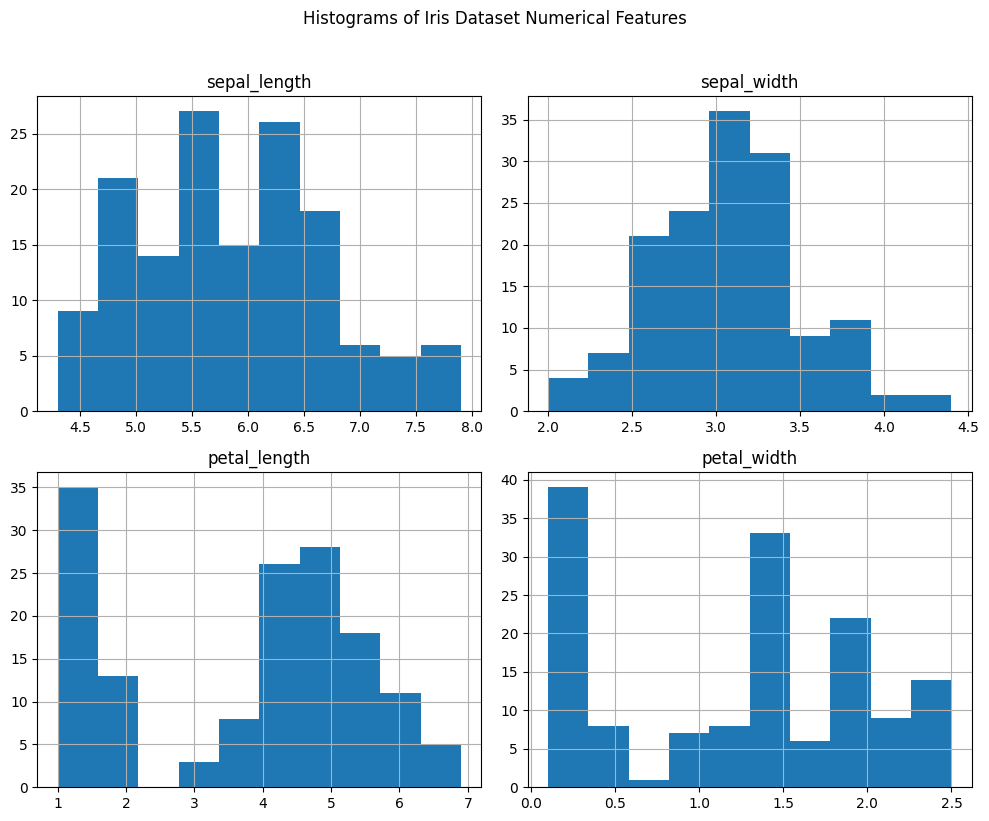

In [10]:
# 3. Histogram to show the distribution of each numerical feature
df.hist(figsize=(10, 8))
plt.suptitle("Histograms of Iris Dataset Numerical Features", y=1.02)
plt.tight_layout()
plt.show()

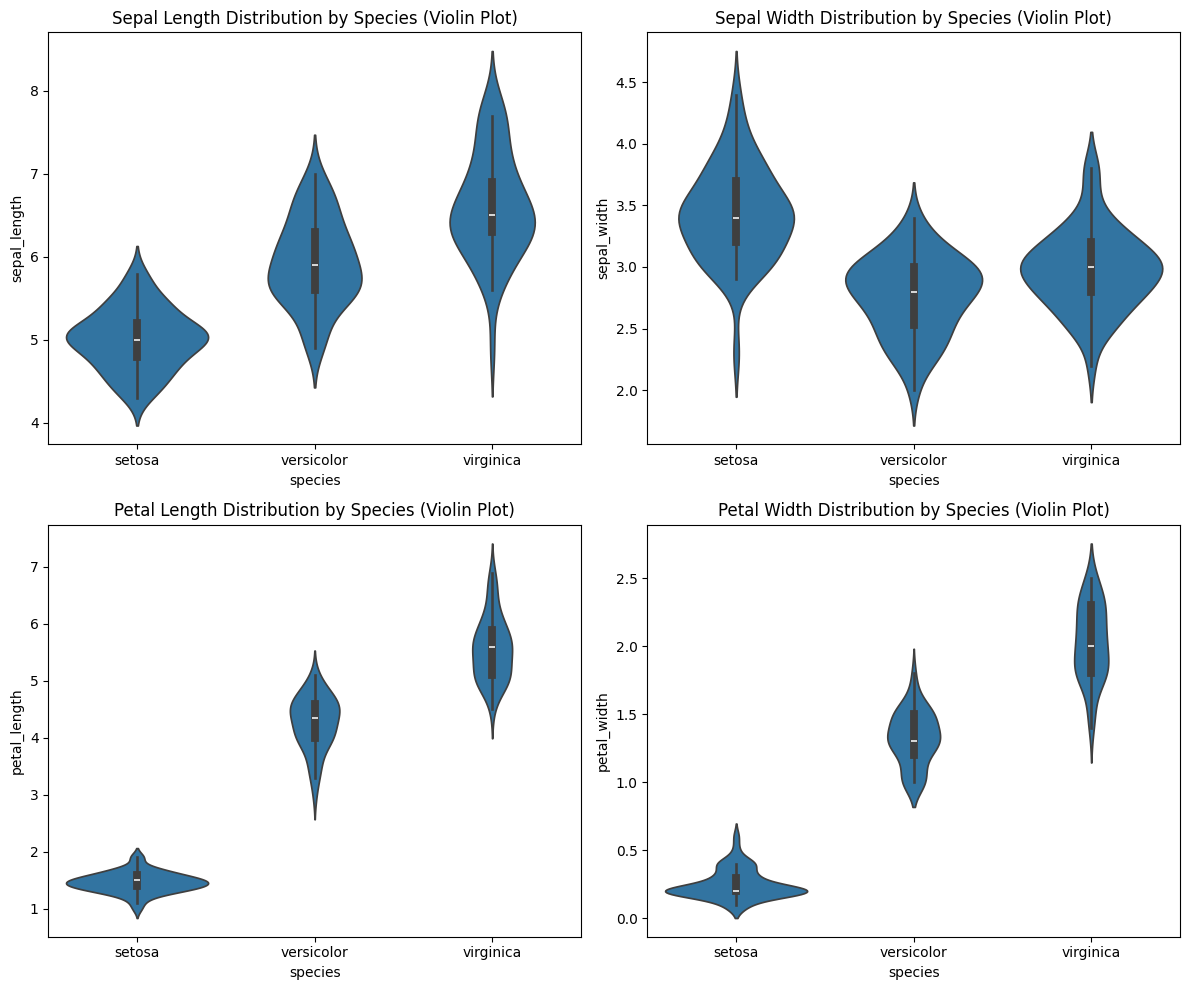

In [9]:
# 4. Violin plot to show the distribution shape of each feature across different species
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.violinplot(ax=axes[0, 0], x='species', y='sepal_length', data=df)
axes[0, 0].set_title('Sepal Length Distribution by Species (Violin Plot)')
sns.violinplot(ax=axes[0, 1], x='species', y='sepal_width', data=df)
axes[0, 1].set_title('Sepal Width Distribution by Species (Violin Plot)')
sns.violinplot(ax=axes[1, 0], x='species', y='petal_length', data=df)
axes[1, 0].set_title('Petal Length Distribution by Species (Violin Plot)')
sns.violinplot(ax=axes[1, 1], x='species', y='petal_width', data=df)
axes[1, 1].set_title('Petal Width Distribution by Species (Violin Plot)')
plt.tight_layout()
plt.show()

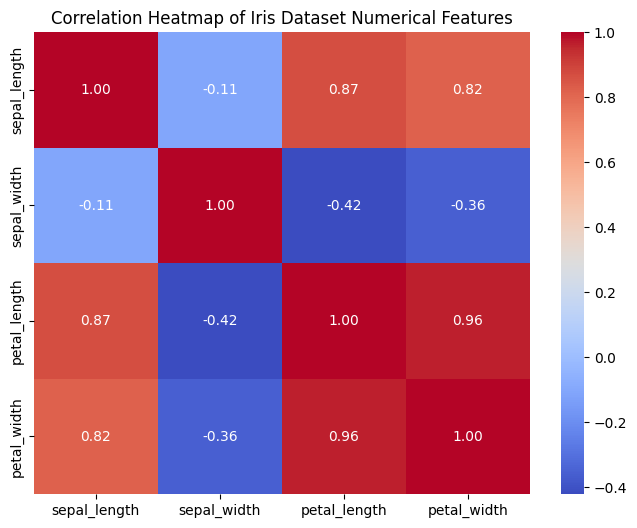

In [8]:
# 5. Correlation heatmap to show the correlation matrix between numerical features
plt.figure(figsize=(8, 6))
correlation_matrix = df.drop('species', axis=1).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Iris Dataset Numerical Features")
plt.show()

## Preparing data for modeling

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features (X) and target (y)
X = df.drop('species', axis=1)
y = df['species']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Display the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

# Display the first few rows of the scaled training features
print("\nFirst 5 rows of X_train_scaled:")
display(pd.DataFrame(X_train_scaled, columns=X.columns).head())

Shape of X_train: (117, 4)
Shape of X_test: (30, 4)
Shape of y_train: (117,)
Shape of y_test: (30,)

First 5 rows of X_train_scaled:


,sepal_length,sepal_width,petal_length,petal_width
0,0.594869,0.058311,0.942503,0.767269
1,-1.606878,0.285725,-1.389208,-1.366947
2,-0.383685,-0.623931,0.601277,1.034046
3,-0.872962,0.967967,-1.332337,-1.366947
4,-1.117601,1.195381,-1.389208,-1.366947


## Building and evaluating a logistic regression model

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np
import matplotlib.pyplot as plt

Accuracy: 0.9333
Precision: 0.9333
Recall: 0.9333


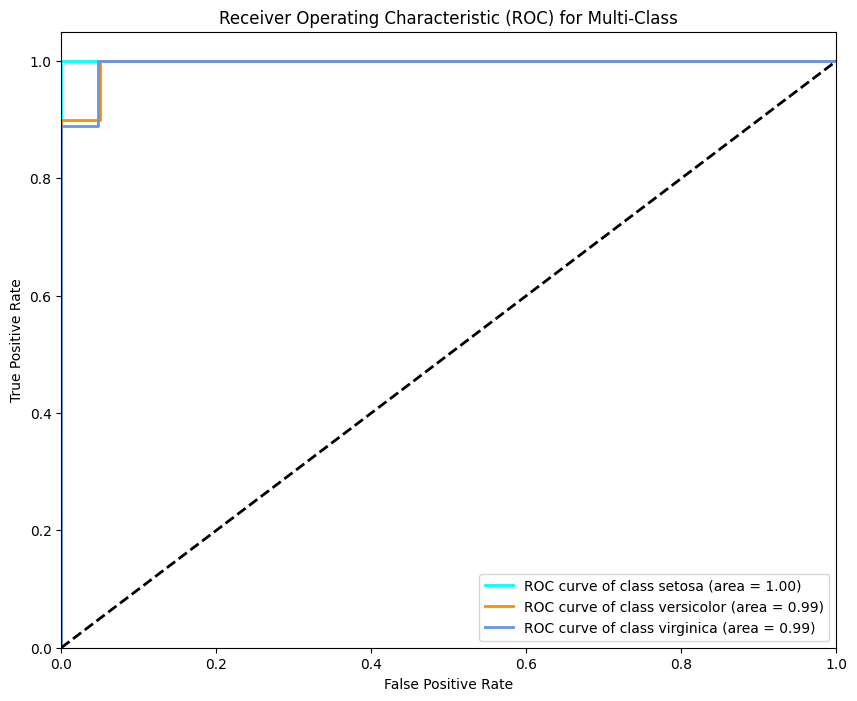

In [6]:
# Initialize and train the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test_scaled)
y_pred_proba = log_reg.predict_proba(X_test_scaled)

# Calculate and print performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# Binarize the output for ROC curve
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 8))
colors = ['aqua', 'darkorange', 'cornflowerblue']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(log_reg.classes_[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for Multi-Class')
plt.legend(loc="lower right")
plt.show()

## Comparing logistic regression with other classifiers

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Initialize and train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Initialize and train SVC model
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test_scaled)
y_pred_svm = svm_model.predict(X_test_scaled)

# Calculate metrics for Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')

# Calculate metrics for SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')

# Print metrics
print("--- Random Forest Metrics ---")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")

print("\n--- SVM Metrics ---")
print(f"Accuracy: {accuracy_svm:.4f}")
print(f"Precision: {precision_svm:.4f}")
print(f"Recall: {recall_svm:.4f}")

print("\n--- Logistic Regression Metrics (from previous step) ---")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# Compare and summarize performance
print("\n--- Model Comparison Summary ---")
print("Logistic Regression Accuracy:", accuracy)
print("Random Forest Accuracy:", accuracy_rf)
print("SVM Accuracy:", accuracy_svm)

print("\nBased on Accuracy, all three models performed similarly well on this dataset.")

--- Random Forest Metrics ---
Accuracy: 0.9333
Precision: 0.9333
Recall: 0.9333

--- SVM Metrics ---
Accuracy: 0.9333
Precision: 0.9333
Recall: 0.9333

--- Logistic Regression Metrics (from previous step) ---
Accuracy: 0.9333
Precision: 0.9333
Recall: 0.9333

--- Model Comparison Summary ---
Logistic Regression Accuracy: 0.9333333333333333
Random Forest Accuracy: 0.9333333333333333
SVM Accuracy: 0.9333333333333333

Based on Accuracy, all three models performed similarly well on this dataset.


## Summary:

### Data Analysis Key Findings

*   The initial dataset contained 150 rows and no missing values.
*   Three duplicate rows were identified and removed, resulting in a cleaned dataset of 147 rows.
*   Exploratory Data Analysis (EDA) revealed clear separations between the Iris species based on petal length and petal width, as shown in the pair plots and box plots. Sepal measurements also showed distinctions, though less pronounced than petal measurements.
*   Petal length and petal width showed a high positive correlation (around 0.96), while sepal length and petal length also had a strong positive correlation (around 0.87).
*   After splitting the data (80% train, 20% test) and scaling the features, all three classification models (Logistic Regression, Random Forest, and SVM) achieved an identical accuracy of approximately 0.9333 on the test set.
*   Precision and Recall metrics were also consistently high (around 0.9333) for all three models.
*   The ROC curves for the Logistic Regression model showed high AUC values for each class, indicating good separability.

### Insights or Next Steps

*   Given the high and identical performance across Logistic Regression, Random Forest, and SVM on this dataset, the simpler Logistic Regression model might be preferred due to its interpretability and computational efficiency.
*   While the models performed well, further steps could include hyperparameter tuning for each model to potentially eke out minor performance improvements, although the current results are already very strong.
